# Model Selection

Train and compare the following models on the default dataset to create a baseline and focus on the data with least error among them.  

1. **XGBoost (Extreme Gradient Boosting)**: It's a highly optimized and powerful gradient boosting library. It works better on tabular data because it's excellent at capturing complex interactions and non-linearities. It also has built-in regularization to prevent overfitting.

2. **LightGBM**: A gradient boosting framework from Microsoft that is very similar to XGBoost but often trains significantly faster. It's also highly efficient and delivers state-of-the-art results.

3. **CatBoost**: Another powerful gradient boosting library that often works well with default parameters. It has some novel techniques for handling categorical data.

4. **Random Forest**: A great baseline model. It's an ensemble of decision trees, robust, and good at capturing non-linear patterns. It's less prone to overfitting than a single decision tree and can give you a very strong result.

5. **Neural Networks (Multi-Layer Perceptron)**: It can capture very complex relationships in the data, build a simple feedforward neural network using libraries like TensorFlow/Keras or PyTorch. This might require more effort in terms of tuning the architecture (number of layers, neurons, etc.) but can sometimes outperform tree-based models.

### 1. Load & Split the Dataset

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

# Directory of the datasets
data_path = Path('../raw_data')

# Load the raw dataset
train_data = None
try:
    train_data = pd.read_csv(data_path / 'train.csv')
except FileNotFoundError:
    print("File not found, recheck the directory or change the path of directory.")

if train_data is not None:
    # Feature & target columns
    feature_cols = [col for col in train_data.columns if 'Component' in col]
    target_cols = [col for col in train_data.columns if 'Blend' in col]

    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(train_data[feature_cols], train_data[target_cols], test_size=0.2, shuffle=True, random_state=42)
    print(f"Training data shape: {X_train.shape}")
    print(f"Validation data shape: {X_val.shape}")

Training data shape: (1600, 55)
Validation data shape: (400, 55)


### 2. Train Models on Default Dataset

#### 2.1 Random Forest

In [2]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# This dictionary will store the MAPE score for each target property
rf_mape_scores = {}

print("--- Training Random Forest Regressor ---\n")

# Loop through each of the 10 target properties
for target in target_cols:
    print(f"- Training model for: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42, n_jobs=-1, bootstrap=True)

    # Train the model on the training data for the current target
    rf_model.fit(X_train, y_train[target])

    # Make predictions on the validation data
    y_pred = rf_model.predict(X_val)

    # Calculate the Mean Absolute Percentage Error (MAPE) for the current target
    mape = mean_absolute_percentage_error(y_val[target], y_pred)

    # Store the MAPE score
    rf_mape_scores[target] = mape
    print(f"    MAPE for {target}: {mape:.4f}")

# Calculate and print the average MAPE across all target properties
average_rf_mape = np.mean(list(rf_mape_scores.values()))
print(f"\nAverage MAPE for Random Forest: {average_rf_mape:.4f}")

--- Training Random Forest Regressor ---

- Training model for: BlendProperty1
    MAPE for BlendProperty1: 24.5462
- Training model for: BlendProperty2
    MAPE for BlendProperty2: 1.9422
- Training model for: BlendProperty3
    MAPE for BlendProperty3: 1.3923
- Training model for: BlendProperty4
    MAPE for BlendProperty4: 1.4810
- Training model for: BlendProperty5
    MAPE for BlendProperty5: 0.0618
- Training model for: BlendProperty6
    MAPE for BlendProperty6: 3.5339
- Training model for: BlendProperty7
    MAPE for BlendProperty7: 1.0681
- Training model for: BlendProperty8
    MAPE for BlendProperty8: 3.8082
- Training model for: BlendProperty9
    MAPE for BlendProperty9: 2.8774
- Training model for: BlendProperty10
    MAPE for BlendProperty10: 0.7609

Average MAPE for Random Forest: 4.1472


#### 2.2 CatBoost

In [3]:
from catboost import CatBoostRegressor

# This dictionary will store the MAPE score for each target property
cb_mape_scores = {}

print("--- Training CatBoost Regressor ---\n")

# Loop through each of the 10 target properties
for target in target_cols:
    print(f"- Training model for: {target}")

    # Initialize the CatBoost model.
    cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=0)

    # Train the model on the training data for the current target
    cat_model.fit(X_train, y_train[target])

    # Make predictions on the validation data
    y_pred = cat_model.predict(X_val)

    # Calculate the Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(y_val[target], y_pred)

    # Store the MAPE score
    cb_mape_scores[target] = mape
    print(f"    MAPE for {target}: {mape:.4f}")

# Calculate and print the average MAPE across all target properties
average_catboost_mape = np.mean(list(cb_mape_scores.values()))
print(f"\nAverage MAPE for CatBoost: {average_catboost_mape:.4f}")

--- Training CatBoost Regressor ---

- Training model for: BlendProperty1
    MAPE for BlendProperty1: 1.1635
- Training model for: BlendProperty2
    MAPE for BlendProperty2: 0.9358
- Training model for: BlendProperty3
    MAPE for BlendProperty3: 0.7268
- Training model for: BlendProperty4
    MAPE for BlendProperty4: 0.4550
- Training model for: BlendProperty5
    MAPE for BlendProperty5: 0.3240
- Training model for: BlendProperty6
    MAPE for BlendProperty6: 0.9703
- Training model for: BlendProperty7
    MAPE for BlendProperty7: 0.8336
- Training model for: BlendProperty8
    MAPE for BlendProperty8: 1.8964
- Training model for: BlendProperty9
    MAPE for BlendProperty9: 1.5430
- Training model for: BlendProperty10
    MAPE for BlendProperty10: 0.3003

Average MAPE for CatBoost: 0.9149


#### 2.3 LightGBM

In [4]:
import lightgbm as lgb

# This dictionary will store the MAPE score for each target property
lgbm_mape_scores = {}

print("--- Training LightGBM Regressor ---\n")

# Loop through each of the 10 target properties
for target in target_cols:
    print(f"- Training model for: {target}")

    # Initialize the LightGBM model.
    lgbm_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1, n_jobs=-1, force_col_wise=True)

    # Train the model on the training data for the current target
    lgbm_model.fit(X_train, y_train[target])

    # Make predictions on the validation data
    y_pred = lgbm_model.predict(X_val)

    # Calculate the Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(y_val[target], y_pred)

    # Store the MAPE score
    lgbm_mape_scores[target] = mape
    print(f"    MAPE for {target}: {mape:.4f}")

# Calculate and print the average MAPE across all target properties
average_lgbm_mape = np.mean(list(lgbm_mape_scores.values()))
print(f"\nAverage MAPE for LightGBM: {average_lgbm_mape:.4f}")

--- Training LightGBM Regressor ---

- Training model for: BlendProperty1
    MAPE for BlendProperty1: 1.6561
- Training model for: BlendProperty2
    MAPE for BlendProperty2: 1.8424
- Training model for: BlendProperty3
    MAPE for BlendProperty3: 0.8298
- Training model for: BlendProperty4
    MAPE for BlendProperty4: 0.8848
- Training model for: BlendProperty5
    MAPE for BlendProperty5: 0.2475
- Training model for: BlendProperty6
    MAPE for BlendProperty6: 1.1262
- Training model for: BlendProperty7
    MAPE for BlendProperty7: 0.7370
- Training model for: BlendProperty8
    MAPE for BlendProperty8: 1.6739
- Training model for: BlendProperty9
    MAPE for BlendProperty9: 2.9184
- Training model for: BlendProperty10
    MAPE for BlendProperty10: 0.5255

Average MAPE for LightGBM: 1.2441


#### 2.4 XGBoost

In [5]:
import xgboost as xgb

# This dictionary will store the MAPE score for each target property
xgb_mape_scores = {}

print("--- Training XGBoost Regressor ---\n")

# Loop through each of the 10 target properties
for target in target_cols:
    print(f"- Training model for: {target}")

    # Initialize the XGBoost model
    xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)

    # Train the model on the training data for the current target
    xgb_model.fit(X_train, y_train[target])

    # Make predictions on the validation data
    y_pred = xgb_model.predict(X_val)

    # Calculate the Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(y_val[target], y_pred)

    # Store the MAPE score
    xgb_mape_scores[target] = mape
    print(f"    MAPE for {target}: {mape:.4f}")

# Calculate and print the average MAPE across all target properties
average_xgb_mape = np.mean(list(xgb_mape_scores.values()))
print(f"\nAverage MAPE for XGBoost: {average_xgb_mape:.4f}")

--- Training XGBoost Regressor ---

- Training model for: BlendProperty1
    MAPE for BlendProperty1: 17.6615
- Training model for: BlendProperty2
    MAPE for BlendProperty2: 2.1303
- Training model for: BlendProperty3
    MAPE for BlendProperty3: 1.1015
- Training model for: BlendProperty4
    MAPE for BlendProperty4: 1.0371
- Training model for: BlendProperty5
    MAPE for BlendProperty5: 0.0656
- Training model for: BlendProperty6
    MAPE for BlendProperty6: 1.4859
- Training model for: BlendProperty7
    MAPE for BlendProperty7: 0.9488
- Training model for: BlendProperty8
    MAPE for BlendProperty8: 2.1432
- Training model for: BlendProperty9
    MAPE for BlendProperty9: 2.2924
- Training model for: BlendProperty10
    MAPE for BlendProperty10: 0.6061

Average MAPE for XGBoost: 2.9472


#### 2.5 Feed-Forward Neural Network

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# --- Data Scaling ---

# Neural networks perform best when input features are scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# This dictionary will store the MAPE score for each target property
nn_mape_scores = {}

print("--- Training Feed-Forward Neural Network ---\n")

# Loop through each of the 10 target properties
for target in y_train.columns:
    print(f"- Training model for: {target}")

    # Define the model architecture
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    # Compile the model. We use MAPE as the loss function to directly optimize for it
    model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

    # Set up EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    model.fit(X_train_scaled, y_train[target], epochs=100, verbose=0)

    # Make predictions on the scaled validation data
    y_pred = model.predict(X_val_scaled).flatten()

    # Calculate the Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(y_val[target], y_pred)

    # Store the MAPE score
    nn_mape_scores[target] = mape
    print(f"    MAPE for {target}: {mape:.4f}")

# Calculate and print the average MAPE across all target properties
average_nn_mape = np.mean(list(nn_mape_scores.values()))
print(f"\nAverage MAPE for Feed-Forward Neural Network: {average_nn_mape:.4f}")

2025-07-17 11:20:13.575239: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-17 11:20:13.580642: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-17 11:20:13.620873: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-17 11:20:13.665144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752731413.711718   31879 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752731413.72

--- Training Feed-Forward Neural Network ---

- Training model for: BlendProperty1


2025-07-17 11:20:16.202986: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    MAPE for BlendProperty1: 4.3589
- Training model for: BlendProperty2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    MAPE for BlendProperty2: 0.7701
- Training model for: BlendProperty3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    MAPE for BlendProperty3: 1.1909
- Training model for: BlendProperty4
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
    MAPE for BlendProperty4: 1.1083
- Training model for: BlendProperty5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    MAPE for BlendProperty5: 1.1515
- Training model for: BlendProperty6
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    MAPE for BlendProperty6: 2.1163
- Training model for: BlendProperty7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    MAPE for BlendProperty7: 1.1964
- Training model for: BlendProperty8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    MAPE for BlendProperty8: 1.9062
- Training model for: BlendProperty9
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    MAPE for BlendProperty9: 2.2571
- Training model for

### 3. Visualize the Result

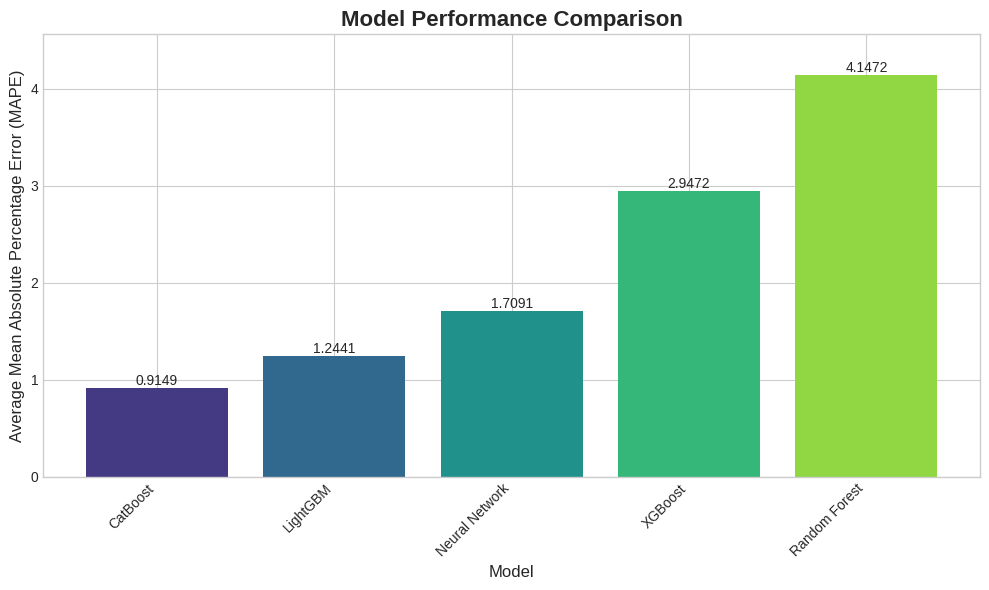

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# This dictionary will hold the final average MAPE for each model
model_performance = {
    'Random Forest': average_rf_mape,
    'CatBoost': average_catboost_mape,
    'LightGBM': average_lgbm_mape,
    'XGBoost': average_xgb_mape,
    'Neural Network': average_nn_mape
}

# Sort the models by their performance (lower MAPE is better)
sorted_models = sorted(model_performance.items(), key=lambda item: item[1])
model_names = [model[0] for model in sorted_models]
mape_scores = [model[1] for model in sorted_models]

# Create the bar chart
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

bars = plt.bar(model_names, mape_scores, color=sns.color_palette("viridis", len(model_names)))

# Add the exact MAPE value on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

# Add labels and a title.
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average Mean Absolute Percentage Error (MAPE)', fontsize=12)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(mape_scores) * 1.1)
plt.tight_layout()
plt.show()

### Observations

1. **CatBoost** dominates the baseline comparison with the lowest MAPE.
2. **LightGBM** performs better than **XGBoost**.
3. **Neural Network** shows decent but suboptimal performance
4. **Random Forest** performs poorly

### Feature Importance for each model

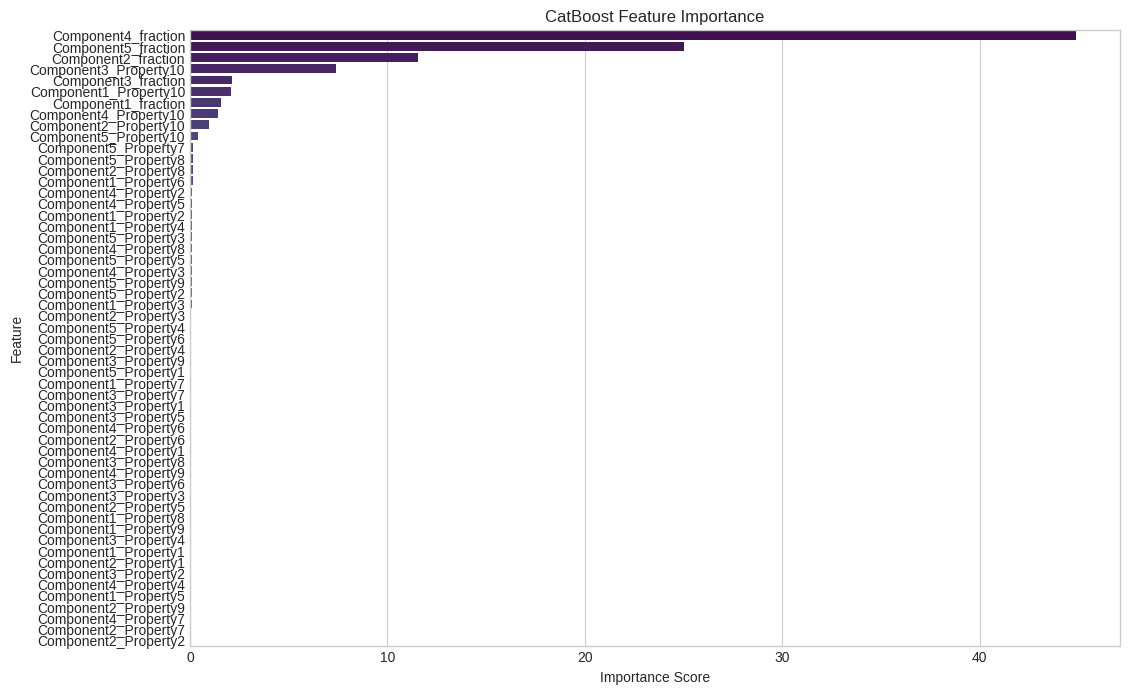

In [8]:
# CatBoost Feature Importance

# Get feature importance from the CatBoost model
cat_feature_importance = cat_model.get_feature_importance()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cat_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

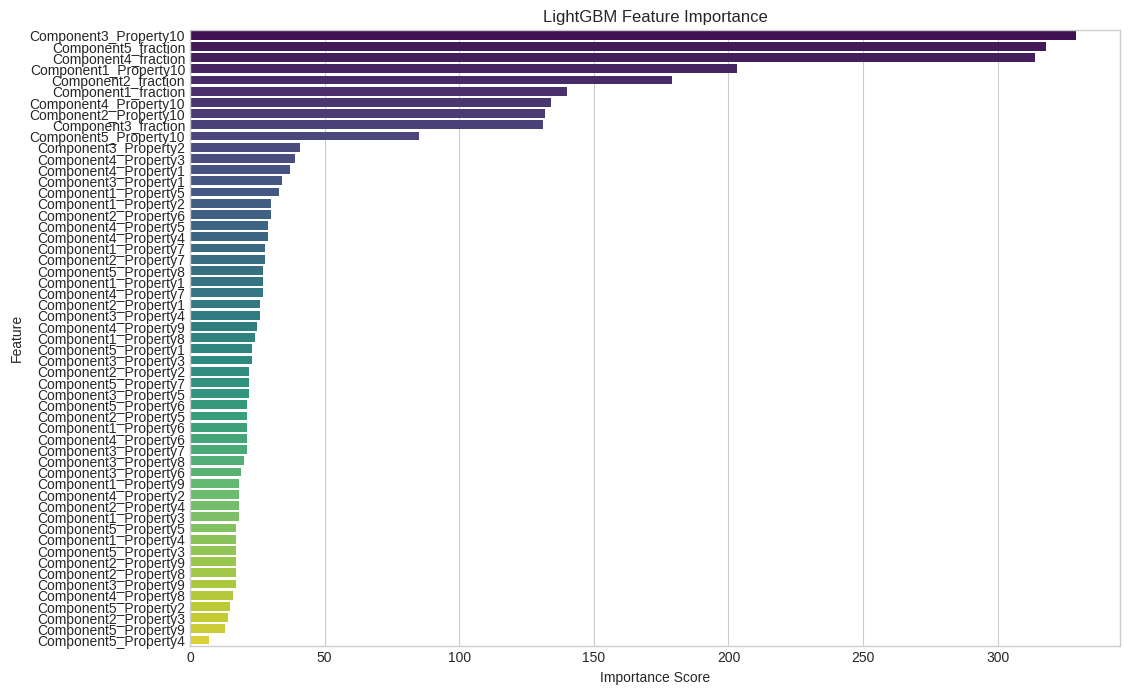

In [9]:
# LightGBM Feature Importance

# Get feature importance from the LightGBM model
lgbm_feature_importance = lgbm_model.feature_importances_

# Create a DataFrame for better visualization
lgbm_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=lgbm_feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

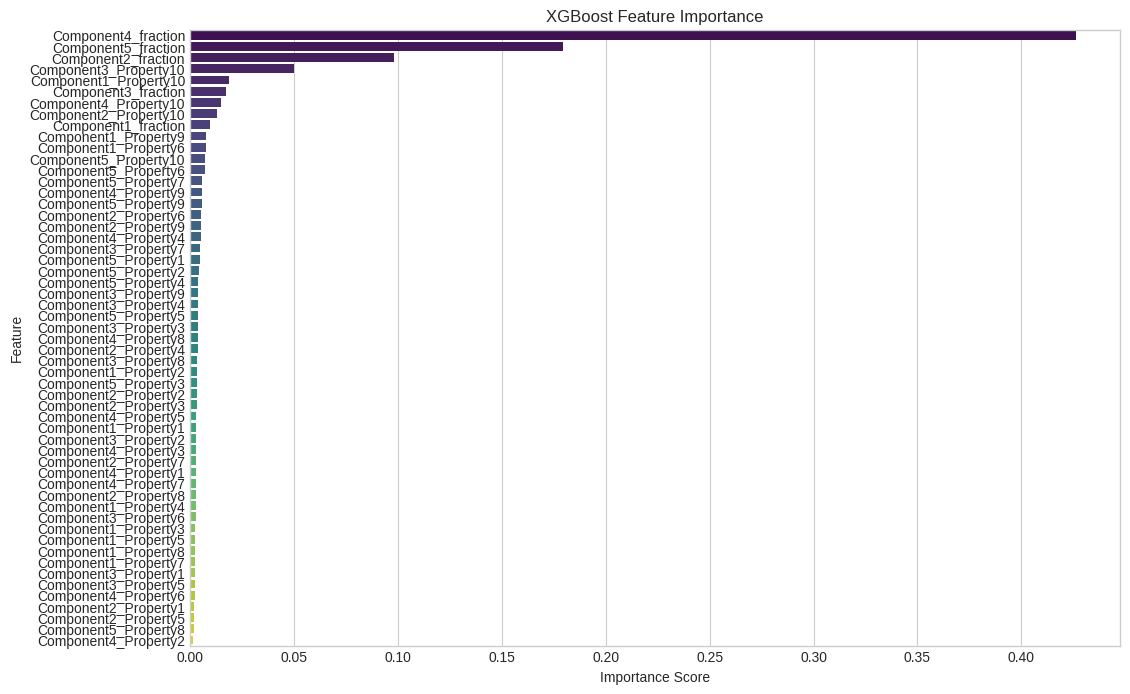

In [10]:
# XGBoost Feature Importance

# Get feature importance from the XGBoost model
xgb_feature_importance = xgb_model.feature_importances_

# Create a DataFrame for better visualization
xgb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

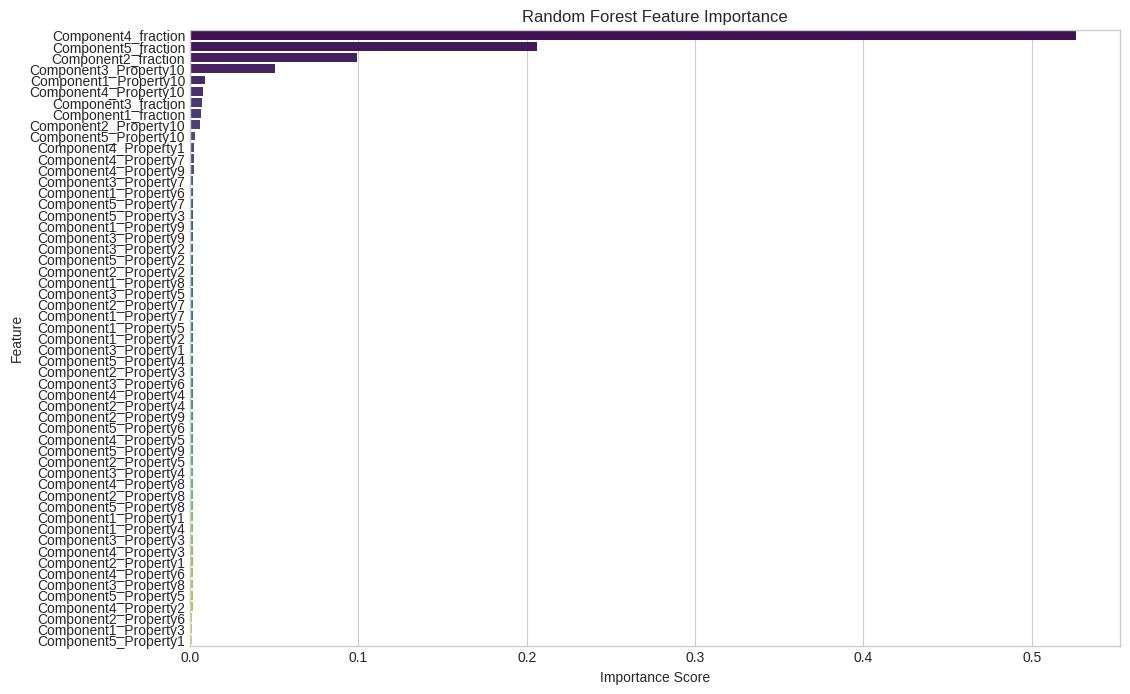

In [11]:
# Random Forest Feature Importance

# Get feature importance from the Random Forest model
rf_feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()